## Model Definition:
Least squares solution (matrix version)

$
L = {\sum\nolimits_{i = 1}^n {\left( {{y_i} - {x_i}^Tw} \right)} ^2}
$

$
L = {\left\| {{y} - Xw} \right\|^2}
$
because $\sum\nolimits_{i = 1}^n {{x_i}^Tw}  = Xw$

$
L = {\left( {{y} - Xw} \right)^T}\left( {{y} - Xw} \right)
$


Find minimum of L

$
{\nabla _w}L = {\nabla _w}\left( {{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right)} \right)
$

$
\Leftrightarrow {\nabla _w}L = {\nabla _w}\left( {{y^T}y - yXw - {X^T}{w^T}y + {X^T}{w^T}Xw} \right)
$

$
\Leftrightarrow {\nabla _w}L = {\nabla _w}\left( {{y^T}y} \right) - {\nabla _w}\left( {yXw} \right) - {\nabla _w}\left( {{X^T}{w^T}y} \right) + {\nabla _w}\left( {{X^T}{w^T}Xw} \right)
$

$
 \Leftrightarrow {\nabla _w}L =  - yX - {X^T}y + 2{X^T}Xw = 0
$

$
\Leftrightarrow {\nabla _w}L =  - {X^T}y - {X^T}y + 2{X^T}Xw =  - 2{X^T}y + 2{X^T}Xw = 0
$

$
\Leftrightarrow 2{X^T}Xw = 2{X^T}y
$

$
\Rightarrow w =  {\left( {{X^T}X} \right)^{ - 1}}{X^T}y
$


## How to fit it:
    - Separate the the training data to 2 parts X = train[:,1:len(X[0])-1] and y = train[:,-1]
    - Find the weight of Linear Regression by the below formula:
$$ w =  {\left( {{X^T}X} \right)^{ - 1}}{X^T}y$$

## How to use it:
    1. Slicing the testing data 
$$x_{new} = test[:,1:]$$
    2. Find the new data by the formula.
$${y_{new}} \approx {x_{new}}^T.{w_{LS}}$$

In [76]:
import numpy as np

class LinearRegression:
	def __init__(self,):
		pass

	def fit(self, X, y):
		self.w = 0
		X_t = X.transpose()
		X_tX = np.matmul(X_t, X).astype("Float64")
		invX_tX = np.linalg.inv(X_tX)
		self.w = np.matmul(np.matmul(invX_tX,X_t),y)

	def predict(self, x):
		y = np.matmul(x.transpose(), self.w)
		return y

# Line Regresion 

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


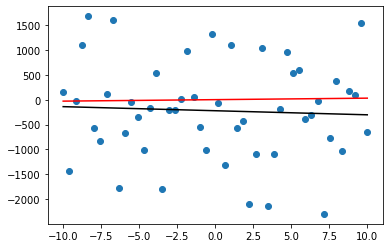

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
a = 3
b = 4
x = np.linspace(-10, 10, n)
X = np.array([[1,i] for i in x ])
y = a* x + b + np.random.normal(0,1000,n)
classifier = LinearRegression()
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x + b, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x,color = 'black')

# Parabola Regression

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


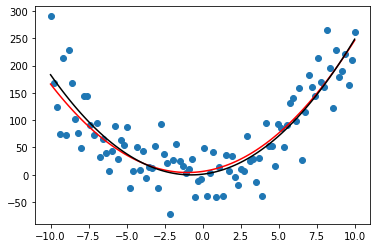

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
a = 2
b = 4
c = 6
x = np.linspace(-10, 10, n)
X = np.array([[1 , i, i*i] for i in x])
y = a*x*x + b*x + c + np.random.normal(0,40,n)
classifier = LinearRegression()
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x*x + b*x + c, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x+classifier.w[2]*x*x,color = 'black')

# Kaggle Regression

In [74]:
# Transform the training and testting data
import pandas as pd

df_train = pd.read_csv("../data/house-price/data/train.csv")
df_test = pd.read_csv("../data/house-price/data/test.csv")
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
df_train = df_train.to_numpy()
df_test = df_test.to_numpy()
for i in range(1,len(df_train[0])-1):
    k = 1.0
    dic = {}
    
    #Transform the training data
    for j in range(len(df_train)):
        if df_train[:,i][j] == "None":
            df_train[:,i][j] = 0.0
            continue
        if type(df_train[:,i][j]) is str:
            if df_train[:,i][j] not in dic:
                dic[df_train[:,i][j]] = k
                k += 1
            df_train[:,i][j] = dic[df_train[:,i][j]]
            
    #Transform the testing data
    for j in range(len(df_test)):
        if type(df_test[:,i][j]) is str:
            if df_test[:,i][j] == "None":
                df_test[:,i][j] = 0.0
                continue
            df_test[:,i][j] = dic[df_test[:,i][j]]

In [75]:
classifier = LinearRegression()

X = df_train[:,1:-1]
y = df_train[:,-1]
X = np.insert(X, 0, 1, axis=1)
classifier.fit(X,y)

f = open("../data/house-price/outputs/submission_linear-regression.csv", "w")
f.write("Id,SalePrice\n" )
test = np.insert(df_test, 1, 1, axis=1)
for i in range(len(test)):
    a = classifier.predict(test[i][1:])
    f.write(str(test[i][0]) + "," + str(round(a, 1)) +"\n")
f.close()

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
